In [60]:
import cv2
import pandas as pd
import numpy as np
import os
from sklearn.cluster import KMeans
import glob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score
import seaborn as sns

In [2]:
path_to_augmented_dataset = "F:\\2022-2023\\SEM 1\\CV\\Dataset_1\\Augmented\\"
temp = ['Bowlegs', 'Knock-knee', 'Normal Knee']

# GET FEATURES

In [3]:
final = pd.DataFrame()
total_descriptors = 0
c = 0
for i in temp:
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(img, None)
        if descriptors is not None:
            print(path_to_file)
            print(len(descriptors))
            total_descriptors += len(descriptors)
            # sift = cv2.SIFT_create()
            # keypoints, descriptors = sift.detectAndCompute(img, None)
            out1 = pd.DataFrame(descriptors)
            csv_data = out1.to_csv(r'ORB\ORB_{}.csv'.format(i), mode='a', index=False)
print("total_descriptors = ", total_descriptors)

F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_10.png
6
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1001.png
2
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1006.png
4
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1012.png
24
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1045.png
37
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1046.png
14
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_105.png
42
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_107.png
28
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_109.png
26
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1093.png
47
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1094.png
22
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1114.png
5
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_112.png
54
F:\2022-2023\SEM 1\CV\Dataset_1\Augmented\Bowlegs\Bowlegs_0_1132.png
55
F:

In [4]:
def read_data(path):
    data = pd.read_csv(path)
    return data.astype(np.uint8)

In [6]:
p0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Bowlegs.csv'
p1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Knock-knee.csv'
p2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_Normal Knee.csv'


data1 = read_data(p0)
print(data1)
data2 = read_data(p1)
print(data2)
data3 = read_data(p2)
print(data3)

# data_f = data_f.append(data2)
# data_f = data_f.append(data3)
# csv_data = data_f.to_csv(r'ORB\ORB_FINAL.csv', mode='w', index=False)
# print("data_f = ",data_f)

         0    1    2    3    4    5    6    7    8    9  ...   22   23   24  \
0       94   48  115  196   51   91   91   88   45  228  ...  165  204  211   
1      232  180  188  113  141  125  213  175  219  255  ...  251   19  203   
2       57  144  224  227   53   30  248   16   85  105  ...  117  128   70   
3       71  233  164  155  221  149  250  236  143   21  ...  219  241   47   
4       31   69  120  230  119   18  254  168   73    0  ...   60  236  243   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
34752    1    8  255  113  100  174  105   19  126   73  ...  101   85  198   
34753   49  207   75  239   54    2  239  245  100   72  ...    5   45  180   
34754   49  207   79  239   54    2  111  181  100    0  ...    5   45  244   
34755  209   89   95  237   36   10  111  180  100  202  ...  101   44  228   
34756  213   92  191  247   40  110  107   16  244  218  ...  187   40  193   

        25   26   27   28   29   30   31  
0      2

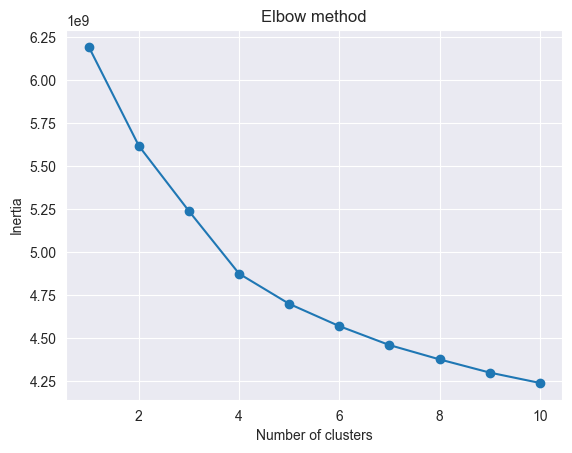

In [39]:
inertias = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data1)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [41]:
kmeans1 = KMeans(n_clusters=4)
kmeans1.fit(data1)

#mango
kmeans2 = KMeans(n_clusters=4)
kmeans2.fit(data2)

#papaya
kmeans3 = KMeans(n_clusters=4)
kmeans3.fit(data3)

KMeans(n_clusters=4)

In [ ]:
import pickle

with open("ORB_model1.pkl", "wb") as f:
    pickle.dump(kmeans1, f)
with open("ORB_model2.pkl", "wb") as f:
    pickle.dump(kmeans2, f)
with open("ORB_model3.pkl", "wb") as f:
    pickle.dump(kmeans3, f)

In [45]:
final = pd.DataFrame()
c = 0

for i in temp:
    data = []
    path_to_folder = path_to_augmented_dataset+i
    for fname in os.listdir(path_to_folder):
        path_to_file = path_to_folder+"\\"+fname
        img = cv2.imread(path_to_file)
        orb = cv2.ORB_create()
        keypoints, descriptors = orb.detectAndCompute(img, None)
        if descriptors is not None:
            out1 = pd.DataFrame(descriptors)
            array_double = np.array(out1)

            if i == temp[0]:
                # print("model 1")
                a=kmeans1.predict(array_double)
            elif i == temp[1]:
                # print("model 2")
                a = kmeans2.predict(array_double)
            else:
                # print("model 3")
                a = kmeans3.predict(array_double)
            hist=np.histogram(a,bins=6)
            data.append(hist[0])
            # csv_data = out1.to_csv(r'SIFT\SIFT_{}.csv'.format(i), mode='a', index=False)
    Output = pd.DataFrame(data)
    Output["Class"] = c
    csv_data=Output.to_csv(r'./ORB\ORB_FINAL_{}.csv'.format(i), mode='a', index=False)
    c += 1

C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\neilk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warni

In [47]:
pf0 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Bowlegs.csv'
pf1 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Knock-knee.csv'
pf2 = r'F:\2022-2023\SEM 1\CV\CV_FINAL\ORB\ORB_FINAL_Normal Knee.csv'
pf = 'ORB\ORB_FINAL.csv'

d1 = fd =  read_data(pf0)
print(d1)
d2 = read_data(pf1)
print(d2)
d3 = read_data(pf2)
print(d3)
fd = fd.append(d2)
fd = fd.append(d3)
print(fd)
csv_data=fd.to_csv(pf, mode='a', index=False)

      0  1  2   3  4   5  Class
0     1  0  0   0  0   5      0
1     1  0  0   0  0   1      0
2     1  0  0   0  0   3      0
3    10  0  0   4  0  10      0
4     8  0  0  21  0   8      0
..   .. .. ..  .. ..  ..    ...
934   4  0  0  29  0  20      0
935   4  0  0   2  0   5      0
936   2  0  0  29  0  11      0
937  19  0  0   6  0  10      0
938   1  0  0   0  0   5      0

[939 rows x 7 columns]
       0  1   2  3   4   5  Class
0     11  0   4  0   5   9      1
1     12  0   7  0   7   6      1
2     37  0  39  0  23  50      1
3      5  0  12  0   0   9      1
4      9  0  12  0  12   6      1
...   .. ..  .. ..  ..  ..    ...
997    3  0  16  0   4  10      1
998    4  0  32  0   1  11      1
999    7  0   7  0  11   3      1
1000  11  0  11  0  19  27      1
1001  49  0  38  0  33  55      1

[1002 rows x 7 columns]
      0  1   2  3  4   5  Class
0     4  0  15  0  0  12      2
1     6  0  13  0  0   4      2
2    46  0  27  0  0  46      2
3     7  0   5  0  0   1      2

C:\Users\neilk\AppData\Local\Temp\ipykernel_16732\1954740349.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d2)
C:\Users\neilk\AppData\Local\Temp\ipykernel_16732\1954740349.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  fd = fd.append(d3)


In [48]:
data = read_data(pf)
X = data.iloc[:, :-1]
print(X)
Y = data.iloc[:, -1]
print(Y)

# train test split
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, train_size=0.8, random_state=5)
print(train_X)
print(test_X)

       0  1   2   3  4   5
0      1  0   0   0  0   5
1      1  0   0   0  0   1
2      1  0   0   0  0   3
3     10  0   0   4  0  10
4      8  0   0  21  0   8
...   .. ..  ..  .. ..  ..
2873  48  0  48   0  0  58
2874   3  0   4   0  0  11
2875   2  0   7   0  0   1
2876   9  0  24   0  0  23
2877   9  0  18   0  0  13

[2878 rows x 6 columns]
0       0
1       0
2       0
3       0
4       0
       ..
2873    2
2874    2
2875    2
2876    2
2877    2
Name: Class, Length: 2878, dtype: uint8
       0  1   2  3   4   5
1447   7  0   1  0   4   3
242   32  0   0  8   0  18
2499  18  0  13  0   0   9
1754  19  0   9  0  11  23
979    3  0   0  0   0   6
...   .. ..  .. ..  ..  ..
1032   9  0  10  0  12   6
2121  29  0  54  0   0  39
1424  47  0  27  0  22  46
1725  29  0  62  0  18  54
2254   9  0  12  0   0   3

[2302 rows x 6 columns]
       0  1   2   3  4   5
1062  13  0   6   0  0   7
2154   8  0   3   0  0   2
847    6  0   0   2  0   4
1332  22  0   9   0  4   8
953   17  0  10  

In [49]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_X = sc.fit_transform(train_X)
test_X = sc.transform(test_X)

# KNN

In [50]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix,accuracy_score


classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(train_X, train_Y)

y_pred = classifier.predict(test_X)

cm = confusion_matrix(test_Y, y_pred)
ac = accuracy_score(test_Y,y_pred)
print(cm)
print(ac)

[[174   2   9]
 [  8 173  25]
 [ 13   2 170]]
0.8975694444444444


In [83]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler

model = XGBClassifier()
# sc = StandardScaler()
# train_X = sc.fit_transform(train_X)
# test_X = sc.transform(test_X)
model.fit(train_X, train_Y)
print(model)
from sklearn.metrics import accuracy_score

y_pred = model.predict(test_X)
# evaluate predictions

cm = confusion_matrix(test_Y, y_pred)
ac = accuracy_score(test_Y, y_pred)
pc = precision_score(test_Y, y_pred, average='macro')
rc = recall_score(test_Y, y_pred, average='macro')
fc = f1_score(test_Y, y_pred, average='macro')
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy: {ac}')
print(f'Precision: {pc}')
print(f'Recall: {rc}')
print(f'F-score: {fc}')


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', ...)
Confusion Matrix: 
 [[170   2  13]
 [  7 187  12]
 [  6   5 174]]
Accuracy: 0.921875
Precision: 0.9224170445678528
Recall: 0.922408816583574
F-score: 0.9217210144927536


# SVM

In [80]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier

# classifier_SVM = SVC(kernel='rbf')
classifier_SVM = SVC(kernel='linear')
# classifier_SVM = SVC(kernel='linear')

In [81]:
classifier_SVM.fit(train_X, train_Y)

SVC(kernel='linear')

In [82]:
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
pc = precision_score(test_Y, predictions, average='macro')
rc = recall_score(test_Y, predictions, average='macro')
fc = f1_score(test_Y, predictions, average='macro')
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy: {ac}')
print(f'Precision: {pc}')
print(f'Recall: {rc}')
print(f'F-score: {fc}')

Confusion Matrix: 
 [[185   0   0]
 [  9 183  14]
 [ 17   0 168]]
Accuracy: 0.9305555555555556
Precision: 0.933284724753919
Recall: 0.9321525408904051
F-score: 0.9302496018276717


In [79]:
classifier_SVM2 = SVC(kernel='sigmoid')
classifier_SVM2.fit(train_X, train_Y)
predictions2 = classifier_SVM2.predict(test_X)
cm = confusion_matrix(test_Y, predictions2)
ac = accuracy_score(test_Y,predictions2)
pc = precision_score(test_Y, predictions2, average='macro')
rc = recall_score(test_Y, predictions2, average='macro')
fc = f1_score(test_Y, predictions, average='macro')
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy: {ac}')
print(f'Precision: {pc}')
print(f'Recall: {rc}')
print(f'F-score: {fc}')

Confusion Matrix: 
 [[180   4   1]
 [  9 169  28]
 [ 20  20 145]]
Accuracy: 0.8576388888888888
Precision: 0.8567416736219573
Recall: 0.8590483687571067
F-score: 0.9302496018276717


In [78]:
classifier_SVM = SVC(kernel='linear')
classifier_SVM.fit(train_X, train_Y)
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
pc = precision_score(test_Y, predictions, average='macro')
rc = recall_score(test_Y, predictions, average='macro')
fc = f1_score(test_Y, predictions, average='macro')
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy: {ac}')
print(f'Precision: {pc}')
print(f'Recall: {rc}')
print(f'F-score: {fc}')

Confusion Matrix: 
 [[185   0   0]
 [  9 183  14]
 [ 17   0 168]]
Accuracy: 0.9305555555555556
Precision: 0.933284724753919
Recall: 0.9321525408904051
F-score: 0.9302496018276717


In [77]:
classifier_SVM = SVC(kernel='rbf')
classifier_SVM.fit(train_X, train_Y)
predictions = classifier_SVM.predict(test_X)
cm = confusion_matrix(test_Y, predictions)
ac = accuracy_score(test_Y,predictions)
pc = precision_score(test_Y, predictions, average='macro')
rc = recall_score(test_Y, predictions, average='macro')
fc = f1_score(test_Y, predictions, average='macro')
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy: {ac}')
print(f'Precision: {pc}')
print(f'Recall: {rc}')
print(f'F-score: {fc}')

Confusion Matrix: 
 [[185   0   0]
 [ 10 171  25]
 [ 17   0 168]]
Accuracy: 0.9097222222222222
Precision: 0.9143692768924953
Recall: 0.9127350651622496
F-score: 0.909346872345222
